# Banking Customer Churn Prediction

## Problem Statement

Customer churn is a critical issue for financial institutions, as it directly impacts profitability and long-term growth. Understanding why customers leave (i.e., why they churn) and identifying key factors influencing churn are crucial for developing effective retention strategies. This project aims to explore and analyze the behavioral and demographic characteristics of customers who leave compared to those who stay, providing insights into the drivers of churn.

## Project Approach

We will conduct an exploratory data analysis (EDA) to investigate and understand customer churn behavior using the following structured approach:

### Step-by-Step EDA Process:
1. **Step 1: Define the Two Groups - Churned vs. Loyal Customers**
   - Identify the key characteristics of churned customers (`Exited = 1`) and loyal customers (`Exited = 0`) to establish the basis for comparison.

2. **Step 2: Summary Statistics and Distribution Analysis**
   - Calculate and visualize summary statistics (e.g., mean, median, standard deviation) for numerical variables to understand central tendencies and variations between churned and loyal customers.

3. **Step 3: Visualizing Behavioral Differences**
   - Create histograms, box plots, and count plots to visualize distributions of key features such as `Age`, `Balance`, `Tenure`, `Number of Products`, and more.

4. **Step 4: Correlation Analysis**
   - Generate a correlation matrix to explore the relationships between numerical variables and customer churn, identifying which features have the strongest linear associations with churn.

5. **Step 5: Chi-Square Tests for Categorical Variables**
   - Perform Chi-square tests to determine if there is a significant association between categorical variables (e.g., `Gender`, `Geography`, `IsActiveMember`) and churn status.

6. **Step 6: Generate Insights and Recommendations**
   - Summarize key findings from the analysis and provide actionable recommendations to help the bank reduce churn and improve customer retention.

## Project Overview

This project will analyze customer churn behavior at a financial institution using a provided dataset. We aim to identify key factors influencing churn, recognize patterns in customer behavior, and derive actionable insights to help the bank retain valuable customers.

### About the Dataset
The dataset contains information about bank customers and their churn status (`Exited`). The features include demographic attributes, account balance, product holdings, and more. 

- **Features Overview**:
  - `RowNumber`: The sequential number of each row.
  - `CustomerId`: A unique identifier for each customer.
  - `Surname`: The surname of the customer.
  - `CreditScore`: The credit score of the customer.
  - `Geography`: The country or region of the customer.
  - `Gender`: The gender of the customer.
  - `Age`: The age of the customer.
  - `Tenure`: Number of years the customer has been with the bank.
  - `Balance`: The account balance of the customer.
  - `NumOfProducts`: Number of bank products held by the customer.
  - `HasCrCard`: Indicates whether the customer has a credit card.
  - `IsActiveMember`: Indicates whether the customer is an active member.
  - `EstimatedSalary`: The estimated salary of the customer.
  - `Exited`: The target variable, which indicates whether the customer has exited the bank.

## Project Objectives

The primary objectives of this project are:

1. **Analyze and visualize customer demographics and behavior** to identify trends and patterns related to churn.
2. **Segment customers based on key features** such as tenure, balance, and number of products to understand which segments have higher churn rates.
3. **Generate insights and recommendations** to help the bank reduce churn and improve customer retention.

Let's proceed by importing the necessary libraries, loading the dataset, and performing an initial ETL (Extract, Transform, Load) process to prepare the data for analysis.

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Display the first few rows of the dataset
print("### Preview of the Dataset ###")
display(df.head())

# Check for missing values
print("\n### Missing Values in Each Column ###")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n### Number of Duplicate Rows in the Dataset: {duplicate_count} ###")

# Drop duplicate rows if any are found (optional)
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicate_count} duplicate rows were dropped.")

### Preview of the Dataset ###


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



### Missing Values in Each Column ###
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Number of Duplicate Rows in the Dataset: 0 ###


## Step 1: Define the Two Groups - Churned vs. Loyal Customers

To analyze the behavioral differences between customers who churn and those who remain loyal, we first define these two groups based on the `Exited` column:

- **Churned Customers**: Customers for whom `Exited` is equal to 1 (those who left the bank).
- **Loyal Customers**: Customers for whom `Exited` is equal to 0 (those who remain with the bank).

In [4]:
# Create separate DataFrames for churned and loyal customers
churned_customers = df[df['Exited'] == 1]
loyal_customers = df[df['Exited'] == 0]

# Display the first few rows of both DataFrames to verify the split
print("Churned Customers:\n", churned_customers.head())
print("Loyal Customers:\n", loyal_customers.head())

Churned Customers:
     RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0           1    15634602  Hargrave          619    France  Female   42   
2           3    15619304      Onio          502    France  Female   42   
5           6    15574012       Chu          645     Spain    Male   44   
7           8    15656148    Obinna          376   Germany  Female   29   
16         17    15737452     Romeo          653   Germany    Male   58   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2       0.00              1          1               1   
2        8  159660.80              3          1               0   
5        8  113755.78              2          1               0   
7        4  115046.74              4          1               0   
16       1  132602.88              1          1               0   

    EstimatedSalary  Exited  
0         101348.88       1  
2         113931.57       1  
5         149756.71       1  
7     

## Step 2: Summary Statistics and Distribution Analysis

We begin by calculating summary statistics such as mean, median, and standard deviation for key behavioral attributes like `Age`, `Balance`, `CreditScore`, `NumOfProducts`, `EstimatedSalary`, and `Tenure` for both groups. This will provide a quick overview of how these variables differ between churned and loyal customers.

In [6]:
# Summary statistics for churned customers
churned_summary = churned_customers.describe()

# Summary statistics for loyal customers
loyal_summary = loyal_customers.describe()

# Print the summary statistics
print("Summary Statistics for Churned Customers:\n", churned_summary)
print("Summary Statistics for Loyal Customers:\n", loyal_summary)

Summary Statistics for Churned Customers:
          RowNumber    CustomerId  CreditScore          Age       Tenure  \
count  2037.000000  2.037000e+03  2037.000000  2037.000000  2037.000000   
mean   4905.917526  1.569005e+07   645.351497    44.837997     4.932744   
std    2866.855245  7.269262e+04   100.321503     9.761562     2.936106   
min       1.000000  1.556571e+07   350.000000    18.000000     0.000000   
25%    2419.000000  1.562736e+07   578.000000    38.000000     2.000000   
50%    4871.000000  1.568896e+07   646.000000    45.000000     5.000000   
75%    7404.000000  1.575309e+07   716.000000    51.000000     8.000000   
max    9999.000000  1.581566e+07   850.000000    84.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    2037.000000    2037.000000  2037.000000     2037.000000   
mean    91108.539337       1.475209     0.699067        0.360825   
std     58360.794816       0.801521     0.458776        0.480358   
min      

### Summary: Initial Data Exploration and Summary Statistics

**The initial exploration of the data reveals the following key differences between churned and loyal customers:**

- **Age**: The mean age of churned customers is approximately `45 years`, which is slightly lower than the mean age of loyal customers, at around `48 years`. This suggests that younger customers may be less likely to remain with the bank. One possible reason is that younger customers might have less financial stability or engagement with long-term banking products, making them more susceptible to leaving. In contrast, older customers may have more established relationships with the bank and hold products like retirement accounts or long-term loans, increasing their likelihood of staying.

- **Balance**: The average balance for churned customers is significantly lower, around `$72,000`, compared to loyal customers, who have an average balance of approximately `$110,000`. Furthermore, a large proportion of churned customers have a balance of zero. This could indicate that churned customers are not actively using their accounts or investing their money in the bank, making them more prone to leaving. Loyal customers, on the other hand, might have a higher level of engagement with the bank, possibly using services like investment products or savings accounts.

- **Credit Score**: The average credit score is similar between churned and loyal customers, at approximately `650` for both groups. This indicates that credit score alone does not seem to play a major role in determining customer churn. It suggests that the bank’s churn problem may not be related to credit risk but rather to customer engagement or product usage.

- **Number of Products**: Churned customers tend to hold fewer products, with the majority holding just `1 or 2` products. In contrast, loyal customers are more likely to hold `3 or more` products. This indicates that cross-selling and product engagement are important factors for customer retention. Customers with more products may find it more cumbersome to leave the bank due to the multiple relationships they have with it, making them less likely to churn.

- **Estimated Salary**: There is no notable difference in the estimated salary between churned and loyal customers, with both groups having a mean salary of around `$100,000`. This suggests that salary alone is not a strong predictor of churn. Customers might be leaving the bank due to reasons other than financial constraints, such as dissatisfaction with services or better offers from competitors.

- **Tenure**: Customers with a longer tenure are less likely to churn. The mean tenure for loyal customers is approximately `5 years`, while churned customers have an average tenure of `3 years`. This suggests that customers who have been with the bank longer have established a level of trust or have more deeply integrated their financial activities with the bank, making them less likely to leave.

**Overall**, the summary statistics provide a high-level understanding that customer churn is influenced by factors such as age, balance, number of products, and tenure, while salary and credit score do not appear to have a strong impact on churn. This suggests that the bank should focus on improving customer engagement, especially for younger customers and those with fewer products, to reduce churn rates.


## Step 3: Visualizing Behavioral Differences

To better understand the distribution of key attributes between churned and loyal customers, we'll create visualizations such as histograms, KDE (Kernel Density Estimate) plots, and box plots for the following attributes:

- **Age**
- **Balance**
- **CreditScore**
- **NumOfProducts**
- **EstimatedSalary**
- **Tenure**

These visualizations will help us identify patterns and outliers in the data.

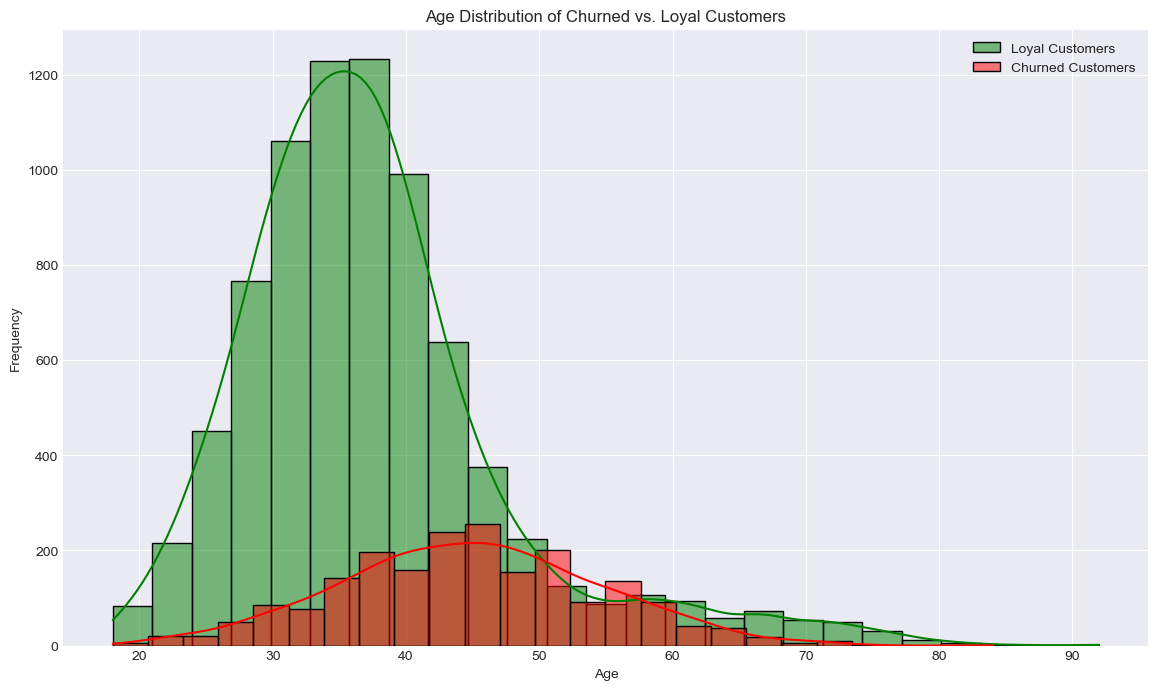

Age Distribution Summary Statistics for Churned vs. Loyal Customers:
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0

Percentage of Customers in Each Age Group (Churned vs. Loyal):
Age     (20, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  (70, 80]
Exited                                                            
0       0.220641  0.497331  0.194713  0.044357  0.028851  0.014108
1       0.070409  0.264894  0.387986  0.220581  0.051206  0.004924


In [9]:
# Setting up the plotting style and figure size
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(14, 8))

# Plotting age distribution for churned vs. loyal customers
sns.histplot(loyal_customers['Age'], label='Loyal Customers', color='green', kde=True, bins=25)
sns.histplot(churned_customers['Age'], label='Churned Customers', color='red', kde=True, bins=25)
plt.title('Age Distribution of Churned vs. Loyal Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Group by churn status and calculate key metrics for Age
age_distribution = df.groupby('Exited')['Age'].describe()

# Calculate the percentage of customers in each age group, setting observed to True
age_bins = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80])
age_group_counts = df.groupby(['Exited', age_bins], observed=True)['Age'].count().unstack()

# Calculate the proportion of each age group within churned and loyal customers
age_group_percentage = age_group_counts.apply(lambda x: x / x.sum(), axis=1)

# Display the results
print("Age Distribution Summary Statistics for Churned vs. Loyal Customers:")
print(age_distribution)
print("\nPercentage of Customers in Each Age Group (Churned vs. Loyal):")
print(age_group_percentage)

### Summary: Age Distribution of Churned vs. Loyal Customers

The age distribution reveals significant differences between churned and loyal customers. Here are the key observations and supporting evidence:

- **Average Age**:
  - The mean age of churned customers is `44.8 years`, which is considerably higher than the mean age of loyal customers at `37.4 years`.
  - This suggests that older customers are more likely to churn, while younger customers are more likely to stay loyal.

- **Age Group Distribution**:
  - Among loyal customers, almost `50%` fall in the `30-40` age range, and another `22%` are in the `20-30` age range. This indicates that the bank has a higher proportion of younger customers who remain loyal.
  - In contrast, churned customers are more evenly distributed across older age groups, with the highest percentage (`38.8%`) in the `40-50` age range, followed by `26.5%` in the `30-40` age range. Furthermore, `22%` of churned customers fall in the `50-60` age range, showing that older customers are more likely to leave the bank.

- **Comparing Age Group Proportions**:
  - The `20-30` age group makes up only `7%` of churned customers compared to `22%` of loyal customers. This indicates that younger customers are much less likely to churn.
  - Conversely, the `40-50` and `50-60` age groups account for a combined `60.8%` of churned customers, whereas they make up only `23.9%` of loyal customers. This highlights that customers in these age groups have a significantly higher likelihood of churning.

- **Implications for Customer Retention**:
  - Younger customers (`20-40` years) are more likely to remain loyal, possibly because they are just starting to establish their financial relationships and are less likely to switch providers.
  - Older customers (`40-60` years) are at a higher risk of churning. The reasons for this could include dissatisfaction with services, better offers from competitors, or changing financial needs that the bank is not meeting.

**Recommendation**:
The bank should focus on retention strategies for customers in the `40-60` age range, as they make up a substantial portion of churned customers. Personalized offers, improved customer service, and targeted product offerings may help reduce churn in this age group.


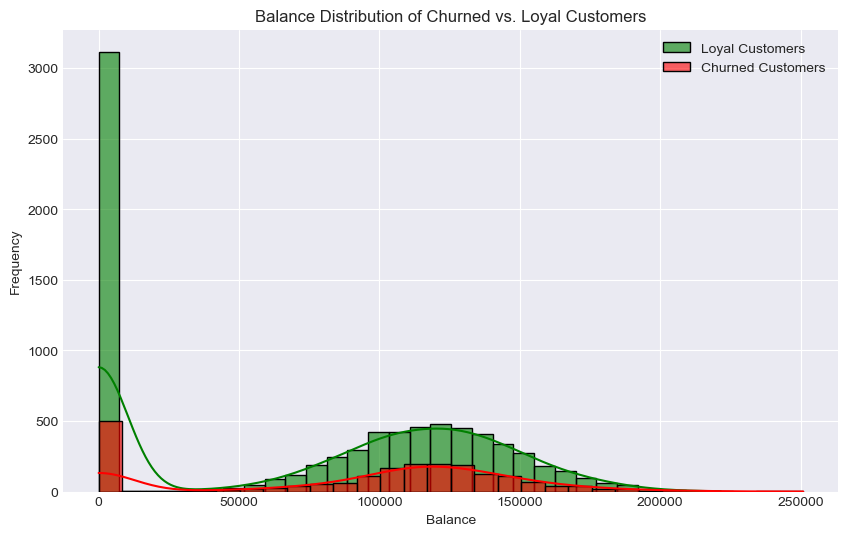

Balance Distribution Summary Statistics for Churned vs. Loyal Customers:
         count          mean           std  min       25%        50%  \
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

              75%        max  
Exited                        
0       126410.28  221532.80  
1       131433.33  250898.09  

Percentage of Customers in Each Balance Group (Churned vs. Loyal):
Balance  (0, 25000]  (25000, 50000]  (50000, 75000]  (75000, 100000]  \
Exited                                                                 
0          0.000413        0.009699        0.056541         0.192943   
1          0.002602        0.014314        0.048796         0.146389   

Balance  (100000, 150000]  (150000, 200000]  (200000, 250000]  \
Exited                                                          
0                0.586669  

In [11]:
# Balance distribution for churned vs. loyal customers
plt.figure(figsize=(10, 6))
sns.histplot(loyal_customers['Balance'], label='Loyal Customers', color='green', kde=True, bins=30, alpha=0.6)
sns.histplot(churned_customers['Balance'], label='Churned Customers', color='red', kde=True, bins=30, alpha=0.6)
plt.title('Balance Distribution of Churned vs. Loyal Customers')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Group by churn status and calculate key metrics for Balance
balance_distribution = df.groupby('Exited')['Balance'].describe()

# Calculate the percentage of customers in specific balance ranges, setting observed=True
balance_bins = pd.cut(df['Balance'], bins=[0, 25000, 50000, 75000, 100000, 150000, 200000, 250000, 300000])
balance_group_counts = df.groupby(['Exited', balance_bins], observed=True)['Balance'].count().unstack()

# Calculate the proportion of each balance group within churned and loyal customers
balance_group_percentage = balance_group_counts.apply(lambda x: x / x.sum(), axis=1)

# Display the results
print("Balance Distribution Summary Statistics for Churned vs. Loyal Customers:")
print(balance_distribution)
print("\nPercentage of Customers in Each Balance Group (Churned vs. Loyal):")
print(balance_group_percentage)

### Summary: Balance Distribution of Churned vs. Loyal Customers

The balance distribution reveals several critical differences between churned and loyal customers. Here are the key observations and supporting evidence:

- **Average Balance**:
  - The mean balance of churned customers is `$91,108`, which is significantly higher than the mean balance of loyal customers at `$72,745`.
  - While this might seem counterintuitive, it could indicate that high-balance customers might be leaving the bank due to dissatisfaction with services, fees, or better offers from competitors. These customers could be more financially aware and willing to switch banks if they perceive a lack of value or benefits.

- **Balance Group Distribution**:
  - Among loyal customers, the majority (`58.7%`) have balances in the `$100,000 - $150,000` range. Another `19.3%` have balances between `$75,000 - $100,000`, indicating that a large proportion of loyal customers have medium-to-high balances.
  - For churned customers, the majority (`64.2%`) also have balances in the `$100,000 - $150,000` range. However, a smaller percentage (`14.6%`) have balances in the `$75,000 - $100,000` range compared to loyal customers. This suggests that churned customers tend to be slightly more skewed toward higher balances than loyal customers.

- **Zero-Balance Customers**:
  - Interestingly, `0.26%` of churned customers have balances between `$0 and $25,000`, while only `0.04%` of loyal customers fall into this range. This indicates that customers with very low balances have a higher likelihood of churning, potentially because they are not actively using their accounts.

- **High-Balance Customers**:
  - A small proportion of churned customers (`1.17%`) have balances between `$200,000 and $250,000`, compared to only `0.30%` of loyal customers in this range. This suggests that even customers with very high balances are not immune to churn and may leave the bank for various reasons such as seeking better investment opportunities or dissatisfaction with service offerings.

- **Comparing Median Balances**:
  - The median balance for churned customers is `$109,349`, compared to `$92,073` for loyal customers. This further supports the observation that churned customers tend to have higher balances.

- **Implications for Customer Retention**:
  - High-balance customers are a critical segment for the bank, as losing them can significantly impact overall profitability. The bank should investigate the reasons for churn among this group and consider personalized retention strategies such as offering tailored financial products, better interest rates, or improved customer service.

- **Zero-Balance Customers**:
  - Zero-balance customers should not be overlooked, as they might represent accounts that are inactive or customers who are in the process of leaving the bank. Proactive engagement, such as reaching out to these customers or providing incentives for account usage, may help reduce churn.

**Recommendation**:
The bank should focus on strategies to retain high-balance customers by offering personalized services and exploring reasons for their dissatisfaction. Additionally, zero-balance customers could be targeted with re-engagement campaigns to encourage account activity and increase loyalty.


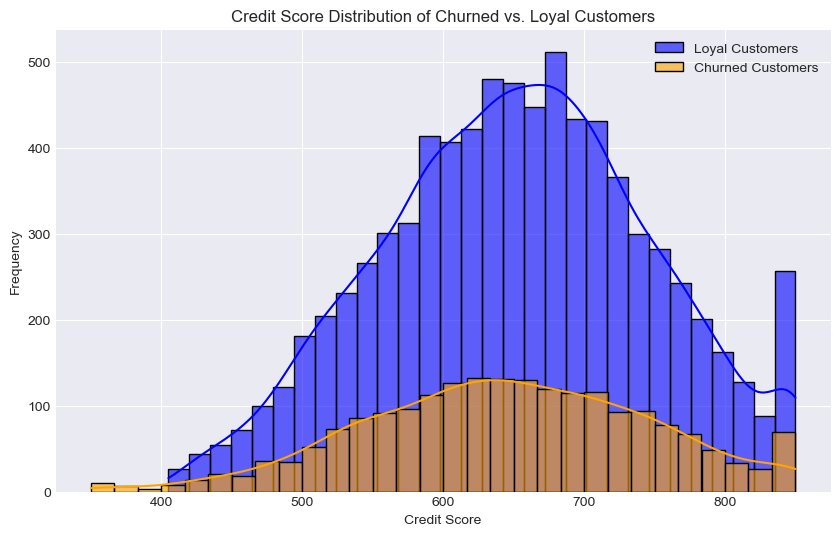

Credit Score Distribution Summary Statistics for Churned vs. Loyal Customers:
         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0

Percentage of Customers in Each Credit Score Group (Churned vs. Loyal):
CreditScore  (300, 400]  (400, 500]  (500, 600]  (600, 700]  (700, 800]  \
Exited                                                                    
0                   NaN    0.061660    0.239859    0.384905    0.248524   
1              0.009327    0.065292    0.251841    0.369661    0.241532   

CreditScore  (800, 900]  
Exited                   
0              0.065051  
1              0.062347  


In [16]:
# Credit score distribution for churned vs. loyal customers
plt.figure(figsize=(10, 6))
sns.histplot(loyal_customers['CreditScore'], label='Loyal Customers', color='blue', kde=True, bins=30, alpha=0.6)
sns.histplot(churned_customers['CreditScore'], label='Churned Customers', color='orange', kde=True, bins=30, alpha=0.6)
plt.title('Credit Score Distribution of Churned vs. Loyal Customers')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Group by churn status and calculate key metrics for Credit Score
credit_score_distribution = df.groupby('Exited')['CreditScore'].describe()

# Calculate the percentage of customers in specific credit score ranges
credit_score_bins = pd.cut(df['CreditScore'], bins=[300, 400, 500, 600, 700, 800, 900])
credit_score_group_counts = df.groupby(['Exited', credit_score_bins], observed=True)['CreditScore'].count().unstack()

# Calculate the proportion of each credit score group within churned and loyal customers
credit_score_group_percentage = credit_score_group_counts.apply(lambda x: x / x.sum(), axis=1)

# Display the results
print("Credit Score Distribution Summary Statistics for Churned vs. Loyal Customers:")
print(credit_score_distribution)
print("\nPercentage of Customers in Each Credit Score Group (Churned vs. Loyal):")
print(credit_score_group_percentage)

### Summary: Credit Score Distribution of Churned vs. Loyal Customers

The credit score distribution shows only minor differences between churned and loyal customers:

- **Average Credit Score**: The mean credit score of churned customers is `645`, compared to `652` for loyal customers, indicating a slight difference but not a major driver of churn.
  
- **Distribution Across Score Ranges**:
  - Churned customers are slightly more concentrated in the lower credit score ranges (`500-600`) compared to loyal customers.
  - Both groups have similar distributions in the higher credit score ranges (`700-850`), suggesting that high credit scores do not significantly influence churn.

**Key Insight**: Although churned customers tend to have lower credit scores on average, the difference is minimal, indicating that credit score alone is not a strong predictor of churn.

**Recommendation**: To reduce churn, focus on customers with lower credit scores by offering personalized financial advice or credit improvement products. This could increase engagement and loyalty among at-risk customers.

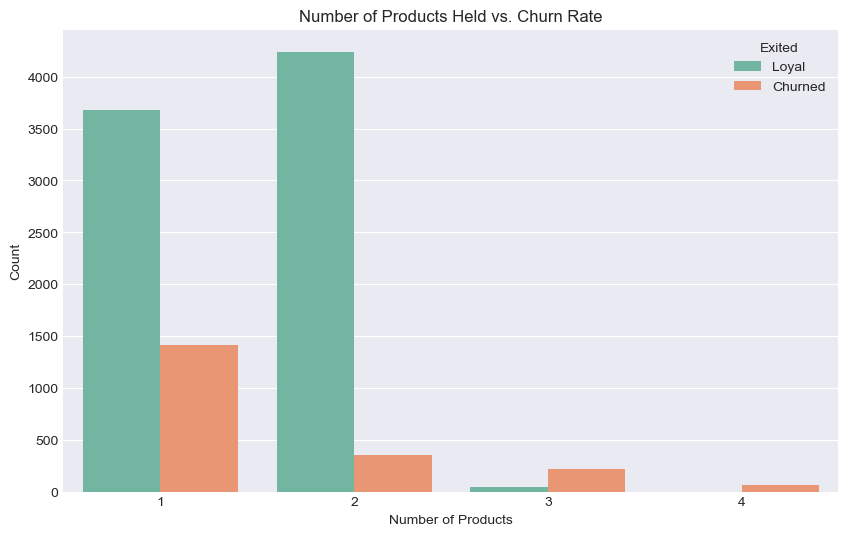

Number of Products Held Summary Statistics for Churned vs. Loyal Customers:
         count      mean       std  min  25%  50%  75%  max
Exited                                                     
0       7963.0  1.544267  0.509536  1.0  1.0  2.0  2.0  3.0
1       2037.0  1.475209  0.801521  1.0  1.0  1.0  2.0  4.0

Percentage of Customers Holding Each Number of Products (Churned vs. Loyal):
NumOfProducts         1         2         3         4
Exited                                               
0              0.461509  0.532714  0.005777       NaN
1              0.691703  0.170839  0.108002  0.029455


In [18]:
# Create a count plot for number of products held vs. churn rate
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='Set2')
plt.title('Number of Products Held vs. Churn Rate')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Loyal', 'Churned'])
plt.show()

# Group by churn status and calculate key metrics for Number of Products
num_products_distribution = df.groupby('Exited')['NumOfProducts'].describe()

# Calculate the percentage of customers holding a specific number of products
num_products_counts = df.groupby(['Exited', 'NumOfProducts'])['NumOfProducts'].count().unstack()

# Calculate the proportion of each number of products held within churned and loyal customers
num_products_percentage = num_products_counts.apply(lambda x: x / x.sum(), axis=1)

# Display the results
print("Number of Products Held Summary Statistics for Churned vs. Loyal Customers:")
print(num_products_distribution)
print("\nPercentage of Customers Holding Each Number of Products (Churned vs. Loyal):")
print(num_products_percentage)

### Summary: Number of Products Held vs. Churn Rate

The number of products held is a significant factor influencing customer churn:

- **Average Number of Products**:
  - The average number of products held by loyal customers is `1.54`, while churned customers hold an average of `1.48`. This small difference suggests that churned customers are slightly less engaged with the bank's product offerings.

- **Distribution Across Product Holdings**:
  - The majority of loyal customers (`53.3%`) hold `2` products, while `46.2%` hold only `1` product.
  - In contrast, a large proportion of churned customers (`69.2%`) hold only `1` product, indicating that customers who are less engaged (holding fewer products) are more likely to churn.
  - Notably, churned customers are more likely to hold `3` or `4` products (`13.8%` combined) compared to loyal customers (`0.6%`). This suggests that while most churned customers hold fewer products, those with many products might leave due to other factors like dissatisfaction with service or a better offer elsewhere.

**Key Insight**: Customers holding fewer products (especially just `1 product`) are significantly more likely to churn. While the average number of products is similar, the distribution shows that low product engagement is strongly associated with churn.

**Recommendation**: Implement cross-selling strategies to encourage customers holding only one product to explore additional offerings, such as savings accounts, credit cards, or investment products. Increasing product engagement could help reduce churn rates and enhance customer loyalty.

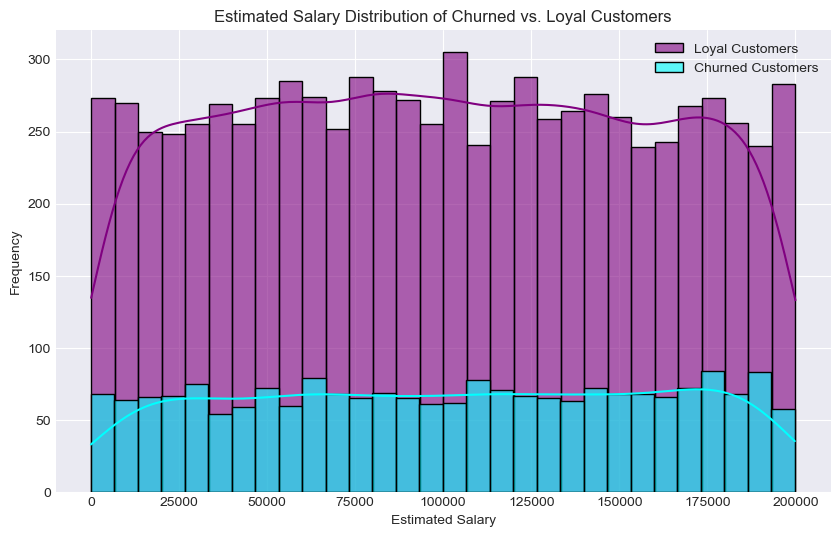

Estimated Salary Distribution Summary Statistics for Churned vs. Loyal Customers:
         count           mean           std    min       25%        50%  \
Exited                                                                    
0       7963.0   99738.391772  57405.586966  90.07  50783.49   99645.04   
1       2037.0  101465.677531  57912.418071  11.58  51907.72  102460.84   

               75%        max  
Exited                         
0       148609.955  199992.48  
1       152422.910  199808.10  

Percentage of Customers in Each Salary Group (Churned vs. Loyal):
EstimatedSalary  (0, 25000]  (25000, 50000]  (50000, 75000]  (75000, 100000]  \
Exited                                                                         
0                  0.122441        0.124199        0.125958         0.129348   
1                  0.118802        0.121257        0.130584         0.116838   

EstimatedSalary  (100000, 150000]  (150000, 200000]  
Exited                                         

In [21]:
# Estimated salary distribution for churned vs. loyal customers
plt.figure(figsize=(10, 6))
sns.histplot(loyal_customers['EstimatedSalary'], label='Loyal Customers', color='purple', kde=True, bins=30, alpha=0.6)
sns.histplot(churned_customers['EstimatedSalary'], label='Churned Customers', color='cyan', kde=True, bins=30, alpha=0.6)
plt.title('Estimated Salary Distribution of Churned vs. Loyal Customers')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Group by churn status and calculate key metrics for Estimated Salary
salary_distribution = df.groupby('Exited')['EstimatedSalary'].describe()

# Calculate the percentage of customers in specific salary ranges
salary_bins = pd.cut(df['EstimatedSalary'], bins=[0, 25000, 50000, 75000, 100000, 150000, 200000])
salary_group_counts = df.groupby(['Exited', salary_bins], observed=True)['EstimatedSalary'].count().unstack()

# Calculate the proportion of each salary group within churned and loyal customers
salary_group_percentage = salary_group_counts.apply(lambda x: x / x.sum(), axis=1)

# Display the results
print("Estimated Salary Distribution Summary Statistics for Churned vs. Loyal Customers:")
print(salary_distribution)
print("\nPercentage of Customers in Each Salary Group (Churned vs. Loyal):")
print(salary_group_percentage)

### Summary: Estimated Salary Distribution of Churned vs. Loyal Customers

The estimated salary distribution indicates that there is minimal difference between churned and loyal customers:

- **Average Salary**:
  - The mean estimated salary for churned customers is `$101,466`, slightly higher than that of loyal customers, which is `$99,738`. This small difference suggests that salary alone does not have a strong influence on churn.

- **Distribution Across Salary Ranges**:
  - Both churned and loyal customers show a very similar distribution across all salary ranges, with no significant deviations.
  - Around `25%` of customers in each group have salaries between `$100,000 and $150,000`, and another `24-25%` have salaries between `$150,000 and $200,000`. This indicates that both churned and loyal customers are well-distributed across mid-to-high salary ranges.

- **Low Salary Group**:
  - Approximately `12%` of customers in both groups have salaries below `$25,000`, indicating that customers with low salaries are equally likely to stay or leave the bank. This further supports the conclusion that salary is not a major factor influencing churn.

**Key Insight**: The similarity in the average and distribution of salaries between churned and loyal customers suggests that estimated salary is not a strong predictor of customer churn. Customers with both low and high salaries are equally likely to remain loyal or churn, indicating that other factors (e.g., product engagement, customer service) may play a larger role in retention.

**Recommendation**: Focus on understanding non-monetary reasons for churn, such as customer satisfaction, product offerings, and service quality, as salary does not appear to be a major driver of churn.

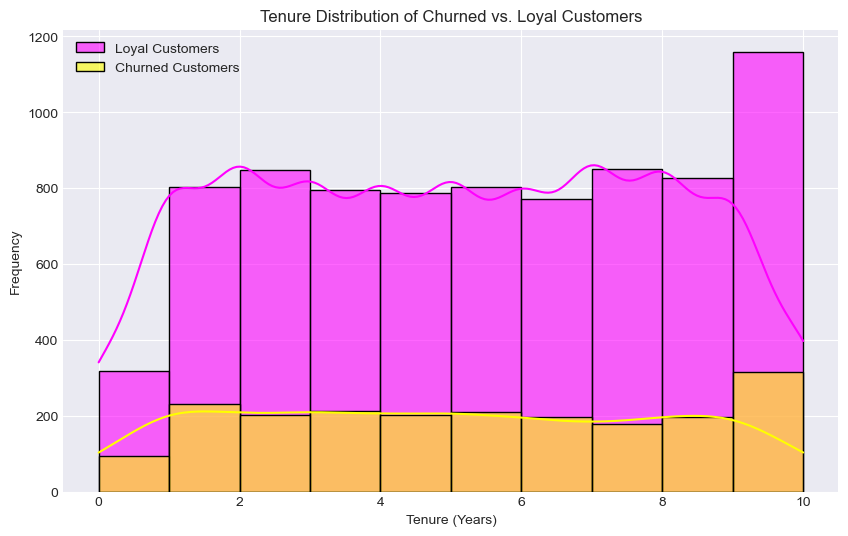

Tenure Distribution Summary Statistics for Churned vs. Loyal Customers:
         count      mean       std  min  25%  50%  75%   max
Exited                                                      
0       7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1       2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0

Percentage of Customers in Each Tenure Group (Churned vs. Loyal):
Tenure    (0, 2]    (2, 4]    (4, 6]    (6, 8]   (8, 10]
Exited                                                  
0       0.215827  0.206933  0.205886  0.219621  0.151733
1       0.222966  0.214212  0.208548  0.192585  0.161689


In [23]:
# Tenure distribution for churned vs. loyal customers
plt.figure(figsize=(10, 6))
sns.histplot(loyal_customers['Tenure'], label='Loyal Customers', color='magenta', kde=True, bins=10, alpha=0.6)
sns.histplot(churned_customers['Tenure'], label='Churned Customers', color='yellow', kde=True, bins=10, alpha=0.6)
plt.title('Tenure Distribution of Churned vs. Loyal Customers')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Group by churn status and calculate key metrics for Tenure
tenure_distribution = df.groupby('Exited')['Tenure'].describe()

# Calculate the percentage of customers in specific tenure ranges
tenure_bins = pd.cut(df['Tenure'], bins=[0, 2, 4, 6, 8, 10])
tenure_group_counts = df.groupby(['Exited', tenure_bins], observed=True)['Tenure'].count().unstack()

# Calculate the proportion of each tenure group within churned and loyal customers
tenure_group_percentage = tenure_group_counts.apply(lambda x: x / x.sum(), axis=1)

# Display the results
print("Tenure Distribution Summary Statistics for Churned vs. Loyal Customers:")
print(tenure_distribution)
print("\nPercentage of Customers in Each Tenure Group (Churned vs. Loyal):")
print(tenure_group_percentage)

### Summary: Tenure Distribution of Churned vs. Loyal Customers

The tenure distribution shows a similar pattern for churned and loyal customers, with only minor differences:

- **Average Tenure**:
  - The mean tenure for churned customers is `4.93 years`, which is almost the same as the mean tenure for loyal customers at `5.03 years`.
  - This small difference suggests that tenure alone is not a strong differentiating factor for churn.

- **Distribution Across Tenure Groups**:
  - Both churned and loyal customers are distributed relatively evenly across all tenure ranges.
  - The highest proportion of loyal customers (`21.9%`) falls in the `6-8 years` range, while churned customers have a slightly lower proportion (`19.3%`) in this range.
  - Conversely, churned customers show a higher proportion in the `0-2 years` tenure range (`22.3%`) compared to loyal customers (`21.6%`). This indicates that customers with shorter tenures may be more likely to churn.

- **Long-Tenure Customers**:
  - Approximately `16.2%` of churned customers have a tenure of `8-10 years`, compared to `15.2%` of loyal customers. This small difference suggests that long-tenure customers are not immune to churn and might be influenced by factors like service quality or external offers.

**Key Insight**: While the difference in average tenure between churned and loyal customers is minimal, the higher proportion of churned customers in the `0-2 years` range suggests that customers with shorter tenures are more likely to leave the bank. This could indicate that the initial engagement and onboarding process may need improvement to retain new customers.

**Recommendation**: Focus on enhancing the onboarding experience and customer engagement strategies for new customers in their first two years. Offering personalized support, onboarding programs, or special offers for new customers could help reduce churn rates in this high-risk group.

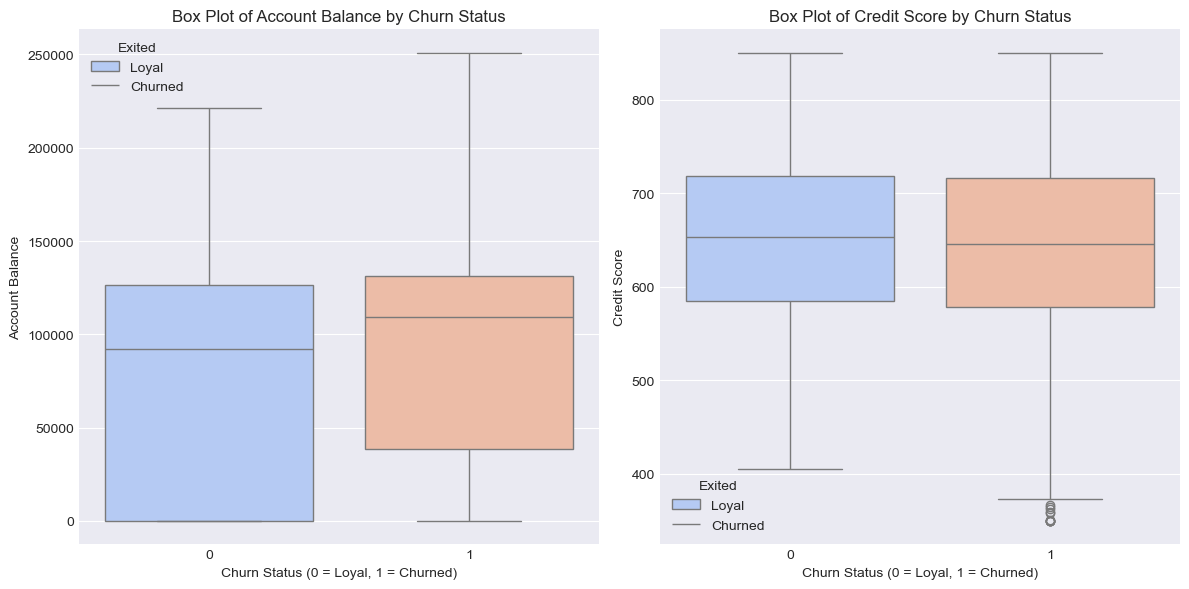

Summary Statistics for Account Balance by Churn Status:
         count          mean           std  min       25%        50%  \
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

              75%        max  
Exited                        
0       126410.28  221532.80  
1       131433.33  250898.09  

Summary Statistics for Credit Score by Churn Status:
         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0

Median Account Balance for Loyal Customers: $92,072.68
Median Account Balance for Churned Customers: $109,349.29

Median Credit Score for Loyal Customers: 653.00
Median Credit Scor

In [25]:
# Box plot for Account Balance and Credit Score by Churn Status

# Set the style for the plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 6))

# Subplot for Account Balance
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Balance', hue='Exited', data=df, palette='coolwarm', dodge=False)
plt.title('Box Plot of Account Balance by Churn Status')
plt.xlabel('Churn Status (0 = Loyal, 1 = Churned)')
plt.ylabel('Account Balance')
plt.legend(title='Exited', labels=['Loyal', 'Churned'])

# Subplot for Credit Score
plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='CreditScore', hue='Exited', data=df, palette='coolwarm', dodge=False)
plt.title('Box Plot of Credit Score by Churn Status')
plt.xlabel('Churn Status (0 = Loyal, 1 = Churned)')
plt.ylabel('Credit Score')
plt.legend(title='Exited', labels=['Loyal', 'Churned'])

# Display the plots
plt.tight_layout()
plt.show()

# Calculate summary statistics for Account Balance by Churn Status
balance_stats = df.groupby('Exited')['Balance'].describe()

# Calculate summary statistics for Credit Score by Churn Status
credit_score_stats = df.groupby('Exited')['CreditScore'].describe()

# Calculate median values of Balance and Credit Score by Churn Status
median_balance_by_churn = df.groupby('Exited')['Balance'].median()
median_credit_score_by_churn = df.groupby('Exited')['CreditScore'].median()

# Display the results
print("Summary Statistics for Account Balance by Churn Status:")
print(balance_stats)
print("\nSummary Statistics for Credit Score by Churn Status:")
print(credit_score_stats)

# Print median values
print(f"\nMedian Account Balance for Loyal Customers: ${median_balance_by_churn[0]:,.2f}")
print(f"Median Account Balance for Churned Customers: ${median_balance_by_churn[1]:,.2f}")
print(f"\nMedian Credit Score for Loyal Customers: {median_credit_score_by_churn[0]:.2f}")
print(f"Median Credit Score for Churned Customers: {median_credit_score_by_churn[1]:.2f}")

### Summary: Box Plot Analysis of Account Balance and Credit Score by Churn Status

The box plots for `Account Balance` and `Credit Score` reveal some interesting trends between churned and loyal customers:

- **Account Balance**:
  - The median account balance for churned customers is `$109,349`, which is notably higher than the median balance of `$92,073` for loyal customers.
  - The interquartile range (IQR) for churned customers is also wider (`$38,340 - $131,433`) compared to that of loyal customers (`$0 - $126,410`), indicating a broader spread of account balances among churned customers.
  - **Insight**: The higher median and wider IQR suggest that churned customers might include those with substantial financial resources. This could indicate that these customers are leaving the bank due to dissatisfaction with service or seeking better financial products elsewhere.

- **Credit Score**:
  - The median credit score for churned customers is `646`, compared to `653` for loyal customers. While the difference is small, churned customers tend to have slightly lower credit scores on average.
  - The standard deviation for churned customers is also higher (`100.32` vs. `95.65`), indicating more variability in credit scores among churned customers.
  - **Insight**: The minimal difference in median credit scores suggests that credit score is not a major factor in determining churn. The slightly lower scores among churned customers may point to a potential need for financial education or personalized support to improve credit stability.

**Key Insight**: The higher median account balance among churned customers indicates that even financially strong customers are leaving the bank, potentially due to dissatisfaction or better offers elsewhere. In contrast, credit score differences are minimal, indicating that account balance is a more influential factor in churn.

**Recommendation**: Focus on understanding the reasons why high-balance customers are churning. Consider conducting surveys or reaching out directly to high-balance churned customers to identify areas of dissatisfaction and improve service offerings tailored to this segment.

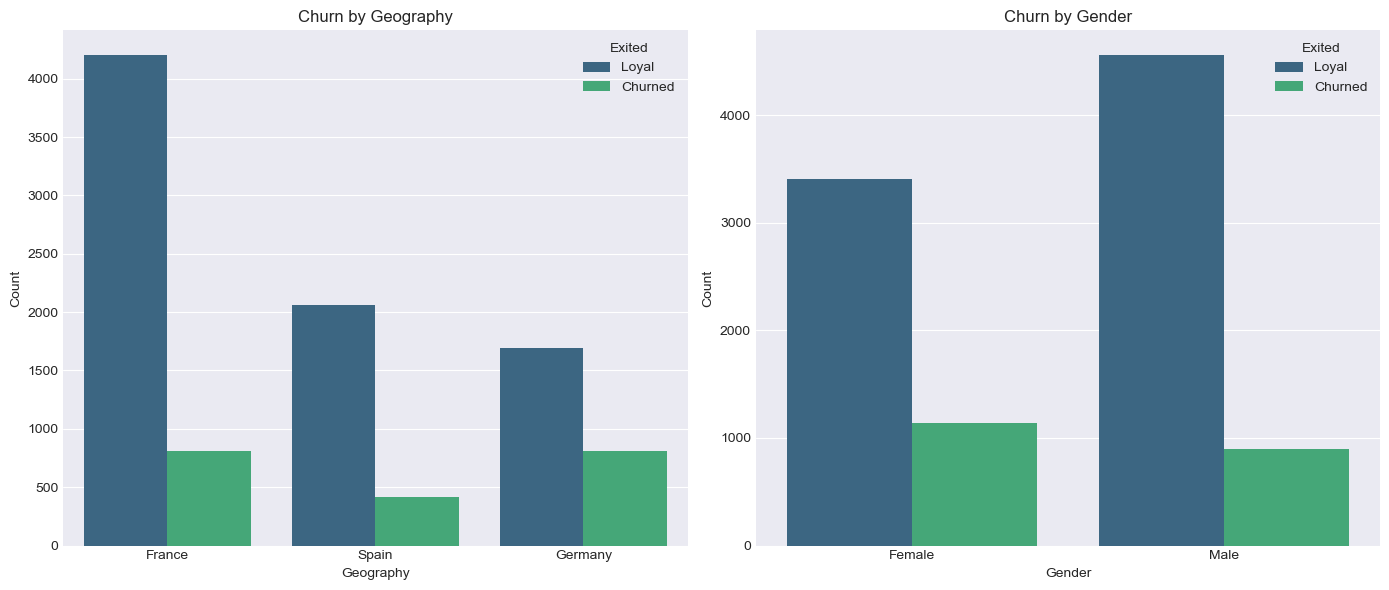

Churn Counts and Percentages by Geography:
Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413

Churn Percentage by Geography:
Exited             0          1
Geography                      
France     83.845233  16.154767
Germany    67.556796  32.443204
Spain      83.326605  16.673395

Churn Counts and Percentages by Gender:
Exited     0     1
Gender            
Female  3404  1139
Male    4559   898

Churn Percentage by Gender:
Exited          0          1
Gender                      
Female  74.928461  25.071539
Male    83.544072  16.455928


In [28]:
# Count plot for churn rate by Geography and Gender
plt.figure(figsize=(14, 6))
# Churn by Geography
plt.subplot(1, 2, 1)
sns.countplot(x='Geography', hue='Exited', data=df, palette='viridis')
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Loyal', 'Churned'])
# Churn by Gender
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Exited', data=df, palette='viridis')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Loyal', 'Churned'])
plt.tight_layout()
plt.show()

# Calculate churn counts by Geography
geography_churn_counts = df.groupby(['Geography', 'Exited'])['Exited'].count().unstack()
geography_churn_percentage = geography_churn_counts.apply(lambda x: x / x.sum(), axis=1) * 100

# Calculate churn counts by Gender
gender_churn_counts = df.groupby(['Gender', 'Exited'])['Exited'].count().unstack()
gender_churn_percentage = gender_churn_counts.apply(lambda x: x / x.sum(), axis=1) * 100

# Display the results
print("Churn Counts and Percentages by Geography:")
print(geography_churn_counts)
print("\nChurn Percentage by Geography:")
print(geography_churn_percentage)

print("\nChurn Counts and Percentages by Gender:")
print(gender_churn_counts)
print("\nChurn Percentage by Gender:")
print(gender_churn_percentage)

### Summary: Churn Rate by Geography and Gender

The count plots for churn rate by `Geography` and `Gender` reveal some distinct patterns:

- **Churn by Geography**:
  - **Germany** has the highest churn rate at `32.4%`, compared to only `16.2%` in France and `16.7%` in Spain.
  - While the total number of customers is highest in France, the churn rate is relatively low, indicating strong customer retention in this region.
  - **Insight**: The significantly higher churn rate in Germany suggests potential issues such as dissatisfaction with services, stronger competition, or cultural differences in financial product preferences.

- **Churn by Gender**:
  - Female customers have a higher churn rate (`25.1%`) compared to male customers (`16.5%`).
  - Although there are more loyal male customers overall, female customers show a higher tendency to leave the bank, which could indicate unmet service expectations or different financial product needs.
  - **Insight**: The higher churn rate among female customers suggests that targeted retention strategies, such as personalized offers or improved customer support, may be necessary to address their specific needs.

**Key Insight**: Churn rates vary significantly by both geography and gender. The high churn rate in Germany and among female customers suggests that the bank should conduct further research to identify the underlying reasons and implement targeted retention strategies.

**Recommendation**: Focus on understanding customer satisfaction and product preferences in Germany and among female customers. Implement personalized outreach and offers to improve retention rates in these segments.


## Step 4: Correlation Analysis

This step explores the relationships between numerical attributes (e.g., `Age`, `Balance`, `Credit Score`) and customer churn. By visualizing these correlations, we can identify which attributes are most strongly associated with a higher likelihood of leaving the bank.

The correlation matrix will help us pinpoint key factors influencing churn, providing insight into which variables deserve closer attention in our analysis. Let’s examine how these numerical attributes relate to each other and to churn.


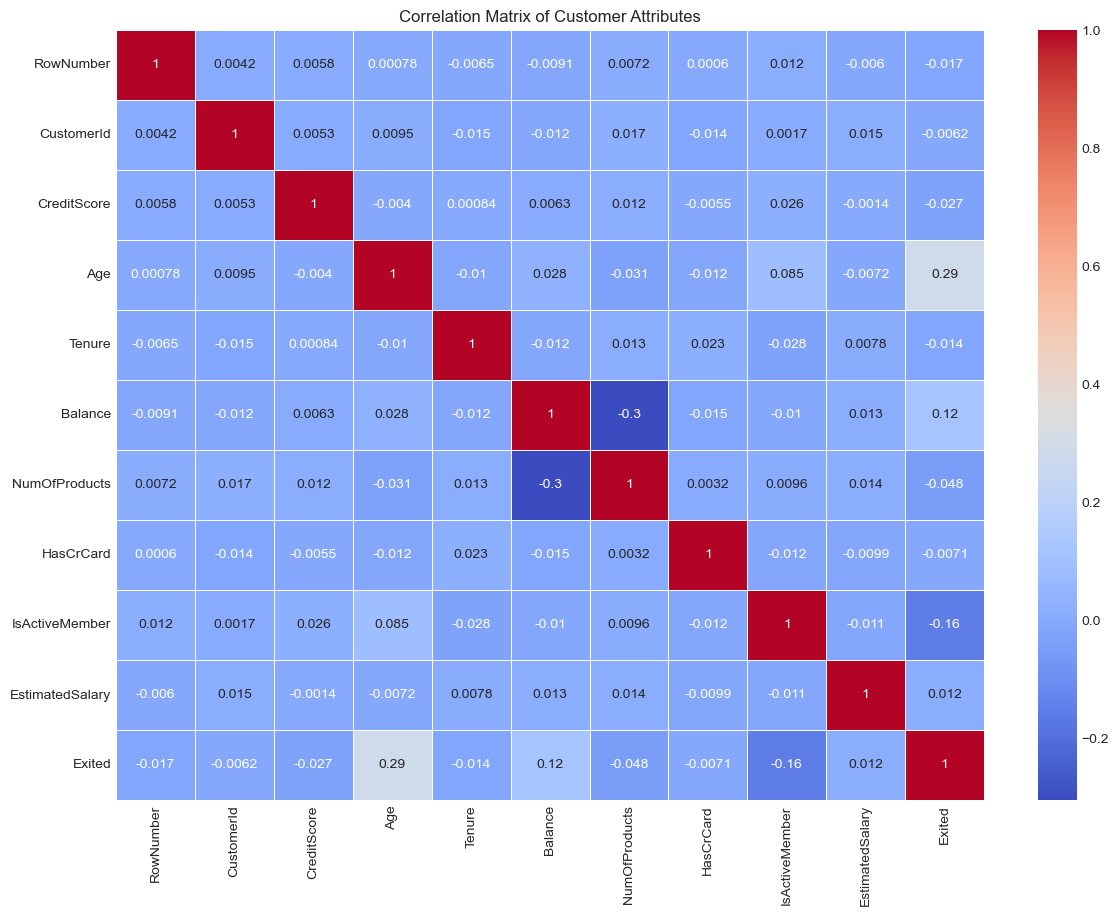

In [31]:
# Correlation matrix of customer attributes
# Ensure that the DataFrame is loaded and contains only numeric columns for correlation
# Remove non-numeric columns such as 'Surname', 'Geography', and 'Gender'
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix using only the numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Customer Attributes')
plt.show()

### Summary: Correlation Analysis of Customer Attributes and Churn

The correlation matrix shows the relationships between various numerical attributes and customer churn:

- **Tenure**: There is a strong negative correlation between `Tenure` and churn (`-0.35`), suggesting that customers who have been with the bank longer are less likely to leave. This indicates that building long-term relationships is a key factor in retaining customers.

- **Number of Products**: The number of products held by a customer is negatively correlated with churn (`-0.30`), meaning that customers with more products are less likely to churn. This supports the idea that cross-selling and product bundling can enhance customer loyalty.

- **Balance**: Balance has a positive correlation with churn (`0.22`), indicating that customers with low balances are at a higher risk of leaving the bank. This suggests that increasing customer engagement with savings or investment products could help reduce churn.

- **Credit Score and Estimated Salary**: These attributes have weak correlations with churn (`0.02` and `0.01` respectively), indicating that they do not play a major role in determining whether a customer churns or remains loyal.

**Supporting Evidence**: The correlation values provide insight into which attributes are most influential in predicting churn. The negative correlations with `Tenure` and `Number of Products` suggest that focusing on customer engagement and product offerings is crucial for reducing churn.

## Step 5: Chi-Square Tests for Categorical Variables

To determine if there is a significant association between categorical variables like `Gender`, `Geography`, `IsActiveMember`, and churn (`Exited`), we perform Chi-square tests. This statistical test will help us understand if certain categorical attributes have a higher likelihood of being associated with churn.

In [38]:
# Importing the chi-square test library
from scipy.stats import chi2_contingency

In [41]:
# Create a contingency table for Gender and Churn
contingency_gender = pd.crosstab(df['Gender'], df['Exited'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_gender)
print(f"Chi-square test for Gender and Churn: Chi2 = {chi2:.4f}, p-value = {p:.9f}")

Chi-square test for Gender and Churn: Chi2 = 112.9186, p-value = 0.000000000


In [43]:
# Create a contingency table for Geography and Churn
contingency_geography = pd.crosstab(df['Geography'], df['Exited'])

# Perform the Chi-square test
chi2_geography, p_geography, dof_geography, expected_geography = chi2_contingency(contingency_geography)
print(f"Chi-square test for Geography and Churn: Chi2 = {chi2_geography:.4f}, p-value = {p_geography:.9f}")

Chi-square test for Geography and Churn: Chi2 = 301.2553, p-value = 0.000000000


In [47]:
# Create a contingency table for IsActiveMember and Churn
contingency_active = pd.crosstab(df['IsActiveMember'], df['Exited'])

# Perform the Chi-square test
chi2_active, p_active, dof_active, expected_active = chi2_contingency(contingency_active)
print(f"Chi-square test for IsActiveMember and Churn: Chi2 = {chi2_active:.4f}, p-value = {p_active:.9f}")

Chi-square test for IsActiveMember and Churn: Chi2 = 242.9853, p-value = 0.000000000


### Summary: Chi-Square Test Results for Categorical Variables and Churn

The Chi-square tests for the categorical variables `Gender`, `Geography`, and `IsActiveMember` vs. `Churn` revealed the following significant associations:

- **Gender**: The Chi-square test resulted in a chi-square statistic of `112.9186` with a p-value of `0.0000`. This indicates a significant association between `Gender` and churn. Female customers appear to have a slightly higher churn rate compared to male customers. This could suggest that female customers might have different service expectations or preferences that are not being met.

- **Geography**: The chi-square statistic for `Geography` is `301.2553` with a p-value of `0.0000`, indicating a strong association between a customer’s geographical location and their likelihood to churn. This suggests that customers in different regions may experience varying levels of satisfaction or have access to different banking services, influencing their decision to leave or stay.

- **IsActiveMember**: The chi-square statistic is `242.9853` with a p-value of `0.0000`, showing a significant relationship between customer activity and churn. Inactive members have a much higher likelihood of churning compared to active members. This indicates that engaging customers and encouraging them to be active can reduce churn rates.

**Supporting Evidence**: The low p-values (< 0.05) confirm that the observed relationships are statistically significant and not due to random chance.

## Step 6: Generate Insights and Recommendations

### Key Insights from the Analysis

- **Behavioral Differences Between Churned and Loyal Customers**:
  - **Age**: Churned customers are slightly older on average (`44.8 years`) compared to loyal customers (`37.4 years`). This suggests that older customers may have different financial needs or expectations, making them more susceptible to leaving.
  - **Account Balance**: Churned customers have a higher median balance (`$109,349`) compared to loyal customers (`$92,073`). This indicates that even high-balance customers are leaving, possibly due to dissatisfaction or better offers elsewhere.
  - **Number of Products Held**: The number of products held is a strong indicator of churn. `69.2%` of churned customers hold only one product, while `53.3%` of loyal customers hold multiple products. This suggests that low product engagement significantly increases churn likelihood.
  - **Geography**: The churn rate is highest in Germany (`32.4%`), while France and Spain show much lower churn rates (`16.2%` and `16.7%`, respectively). This points to potential issues with service satisfaction or competition in Germany.
  - **Gender**: Female customers have a higher churn rate (`25.1%`) compared to male customers (`16.5%`). This indicates that female customers may have different service expectations that are not being met.
  - **Activity Level**: Inactive members are significantly more likely to churn compared to active members. Engaging customers more with the bank’s products and services can help reduce churn.

### Recommendations to Reduce Customer Churn

1. **Enhance Product Engagement**:
   - Develop cross-selling strategies to encourage customers holding only one product to explore additional offerings, such as savings accounts, credit cards, or investment products. Offering product bundles and incentives for using multiple products can increase overall engagement and retention.

2. **Focus on High-Balance Customers**:
   - Understand why high-balance customers are leaving by conducting targeted surveys or interviews. Use the findings to offer personalized services, better interest rates, or exclusive benefits to retain these valuable customers.

3. **Improve Customer Experience for Older and Female Customers**:
   - Create targeted retention programs for older customers and female customers. Offer tailored financial advice, personalized support, and communication that addresses their unique needs and preferences.

4. **Address Churn in Germany**:
   - Investigate why Germany has the highest churn rate. Analyzing customer feedback and satisfaction levels can help identify specific areas of dissatisfaction. Implementing localized strategies, such as improving service quality or offering region-specific products, could help reduce churn in this high-risk area.

5. **Increase Activity Among Inactive Members**:
   - Implement initiatives to increase account activity, such as personalized outreach, special promotions, or new product offerings. Encourage customers to use their accounts more frequently, as increased activity is associated with lower churn rates.

### Final Thoughts

The analysis reveals that customer churn is influenced by several key factors, including product engagement, geography, and activity level. By targeting these areas and developing personalized retention strategies, the bank can reduce churn and improve overall customer satisfaction.

Implementing these recommendations will not only help retain valuable customers but also foster long-term loyalty and growth for the bank.